🚀 Smart Loan Recovery System – Professional Execution Plan


 Objective:
Build a system that predicts individuals most likely to default on loans and suggests smart recovery actions (early contact, rescheduling, legal warning, etc.).


✅ Project Stages:

1. Problem Understanding and Goal Definition


In this stage, we clearly define what we aim to achieve. The system will focus on classifying borrowers into two categories: Default and No Default. The target column in our data is Risk_Flag where:
 * 0: means No Default (the borrower is not expected to default).
 * 1: means Default (the borrower is expected to default).
The ultimate goal is to use this prediction to suggest appropriate and early recovery actions to minimize losses.
Code:
There is no direct code for this stage, as it is a conceptual and planning phase.

🟢 2. Data Collection or Loading


In this stage, we load the dataset we will be working with. You have already uploaded the Loan_Prediction.csv file, and we will read it using the Pandas library

Code:

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Loan_Prediction.csv to Loan_Prediction.csv


In [3]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('Loan_Prediction.csv')
    print("Dataset 'Loan_Prediction.csv' loaded successfully!")
except FileNotFoundError:
    print("Error: Loan_Prediction.csv not found. Please ensure the file is uploaded to Google Colab.")
    print("You can upload it by clicking the folder icon on the left sidebar -> Upload button.")
    # Stopping execution if file not found, as subsequent steps depend on it.
    exit()

# Display the first 5 rows to verify correct loading and data structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display basic information about columns, data types, and presence of missing values
print("\nBasic information about the dataset:")
print(df.info())

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Check the distribution of the target variable (Risk_Flag)
print("\nDistribution of 'Risk_Flag' (Target Variable):")
print(df['Risk_Flag'].value_counts())
print("\nPercentage distribution of 'Risk_Flag':")
print(df['Risk_Flag'].value_counts(normalize=True) * 100)

Dataset 'Loan_Prediction.csv' loaded successfully!

First 5 rows of the dataset:
   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappall

####🟢 3. Exploratory Data Analysis (EDA)


Exploratory Data Analysis is a crucial step to understand the characteristics of our dataset. We will visualize and summarize the data to identify patterns, relationships between features, and potential issues like outliers or imbalanced classes. This will guide our subsequent data cleaning and feature engineering steps

 --- 3.1. Analyze Target Variable Distribution ---


 Code:


--- 3.1. Analyzing Target Variable Distribution (Risk_Flag) ---


/tmp/ipython-input-13-692169413.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Flag', data=df, palette='viridis')


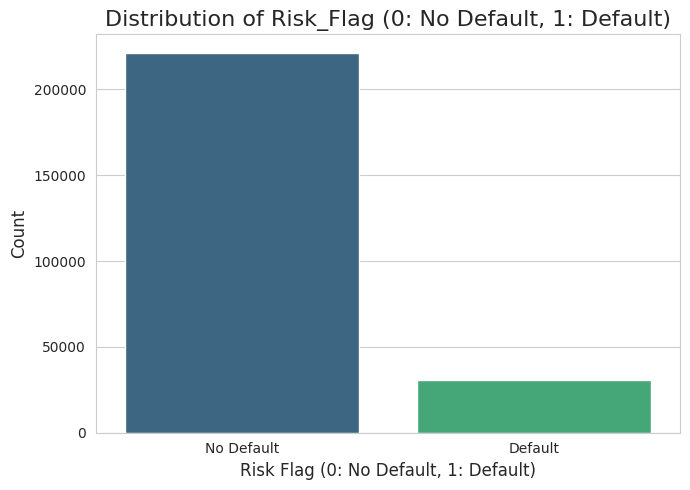


Counts and Percentages of Risk_Flag:
Counts:
Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

Percentages:
Risk_Flag
0    87.7
1    12.3
Name: proportion, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots for better aesthetics
sns.set_style("whitegrid")

print("\n--- 3.1. Analyzing Target Variable Distribution (Risk_Flag) ---")

# Create a count plot to visualize the distribution of 'Risk_Flag'
plt.figure(figsize=(7, 5))
sns.countplot(x='Risk_Flag', data=df, palette='viridis')
plt.title('Distribution of Risk_Flag (0: No Default, 1: Default)', fontsize=16)
plt.xlabel('Risk Flag (0: No Default, 1: Default)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

# Print the value counts and percentages for 'Risk_Flag'
print("\nCounts and Percentages of Risk_Flag:")
risk_flag_counts = df['Risk_Flag'].value_counts()
risk_flag_percentages = df['Risk_Flag'].value_counts(normalize=True) * 100

print("Counts:")
print(risk_flag_counts)
print("\nPercentages:")
print(risk_flag_percentages.round(2))

 --- 3.2. Analyze Numerical Features Distribution ---


Code:


--- 3.2. Analyzing Numerical Features Distribution ---


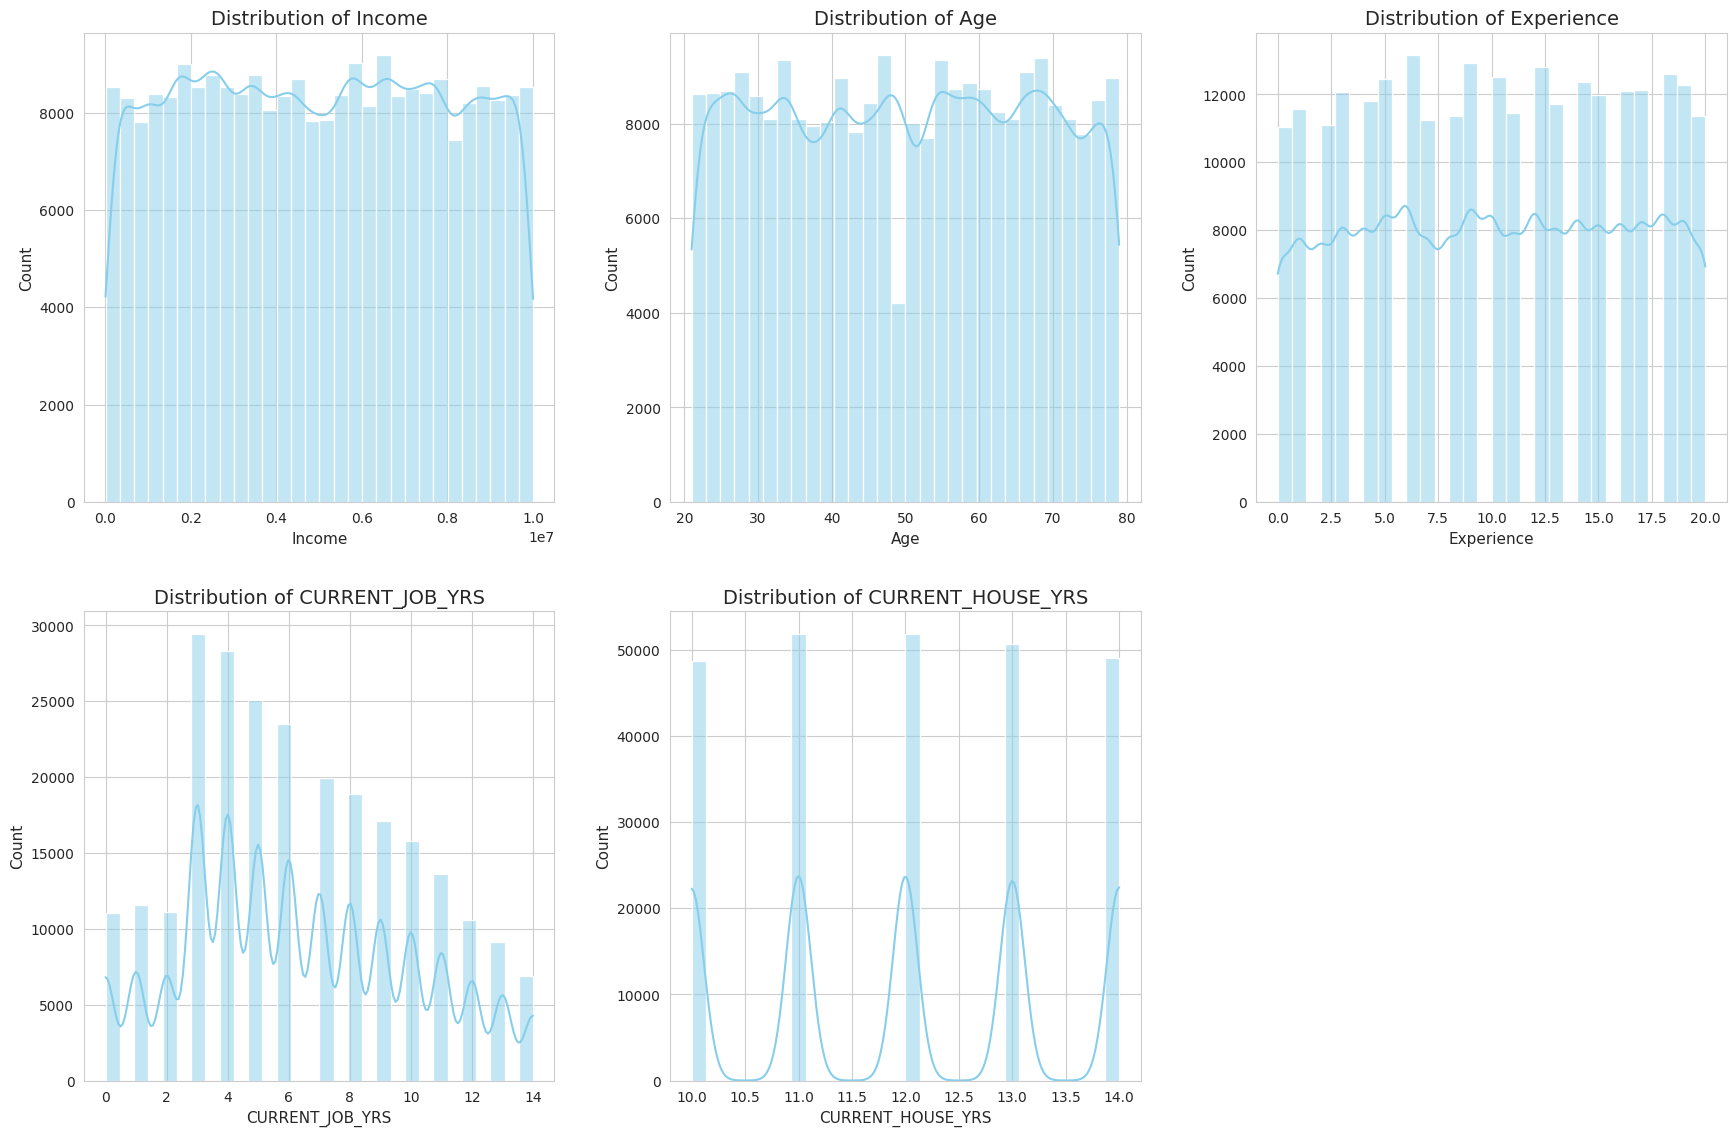


Completed plotting numerical feature distributions.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style is set
sns.set_style("whitegrid")

print("\n--- 3.2. Analyzing Numerical Features Distribution ---")

numerical_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Create subplots for each numerical feature's distribution
plt.figure(figsize=(18, 12)) # Adjusted figure size for better visibility
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    sns.histplot(df[col], kde=True, bins=30, color='skyblue') # Added bins for detail
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Count', fontsize=11)
plt.tight_layout(pad=3.0) # Added padding for better layout
plt.show()

print("\nCompleted plotting numerical feature distributions.")


 --- 3.3. Analyze Numerical Features vs. Target Variable ---


Code:


--- 3.3. Analyzing Numerical Features vs. Risk_Flag (Target Variable) ---


/tmp/ipython-input-10-3539922484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk_Flag', y=col, data=df, palette='pastel')
/tmp/ipython-input-10-3539922484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk_Flag', y=col, data=df, palette='pastel')
/tmp/ipython-input-10-3539922484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk_Flag', y=col, data=df, palette='pastel')
/tmp/ipython-input-10-3539922484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

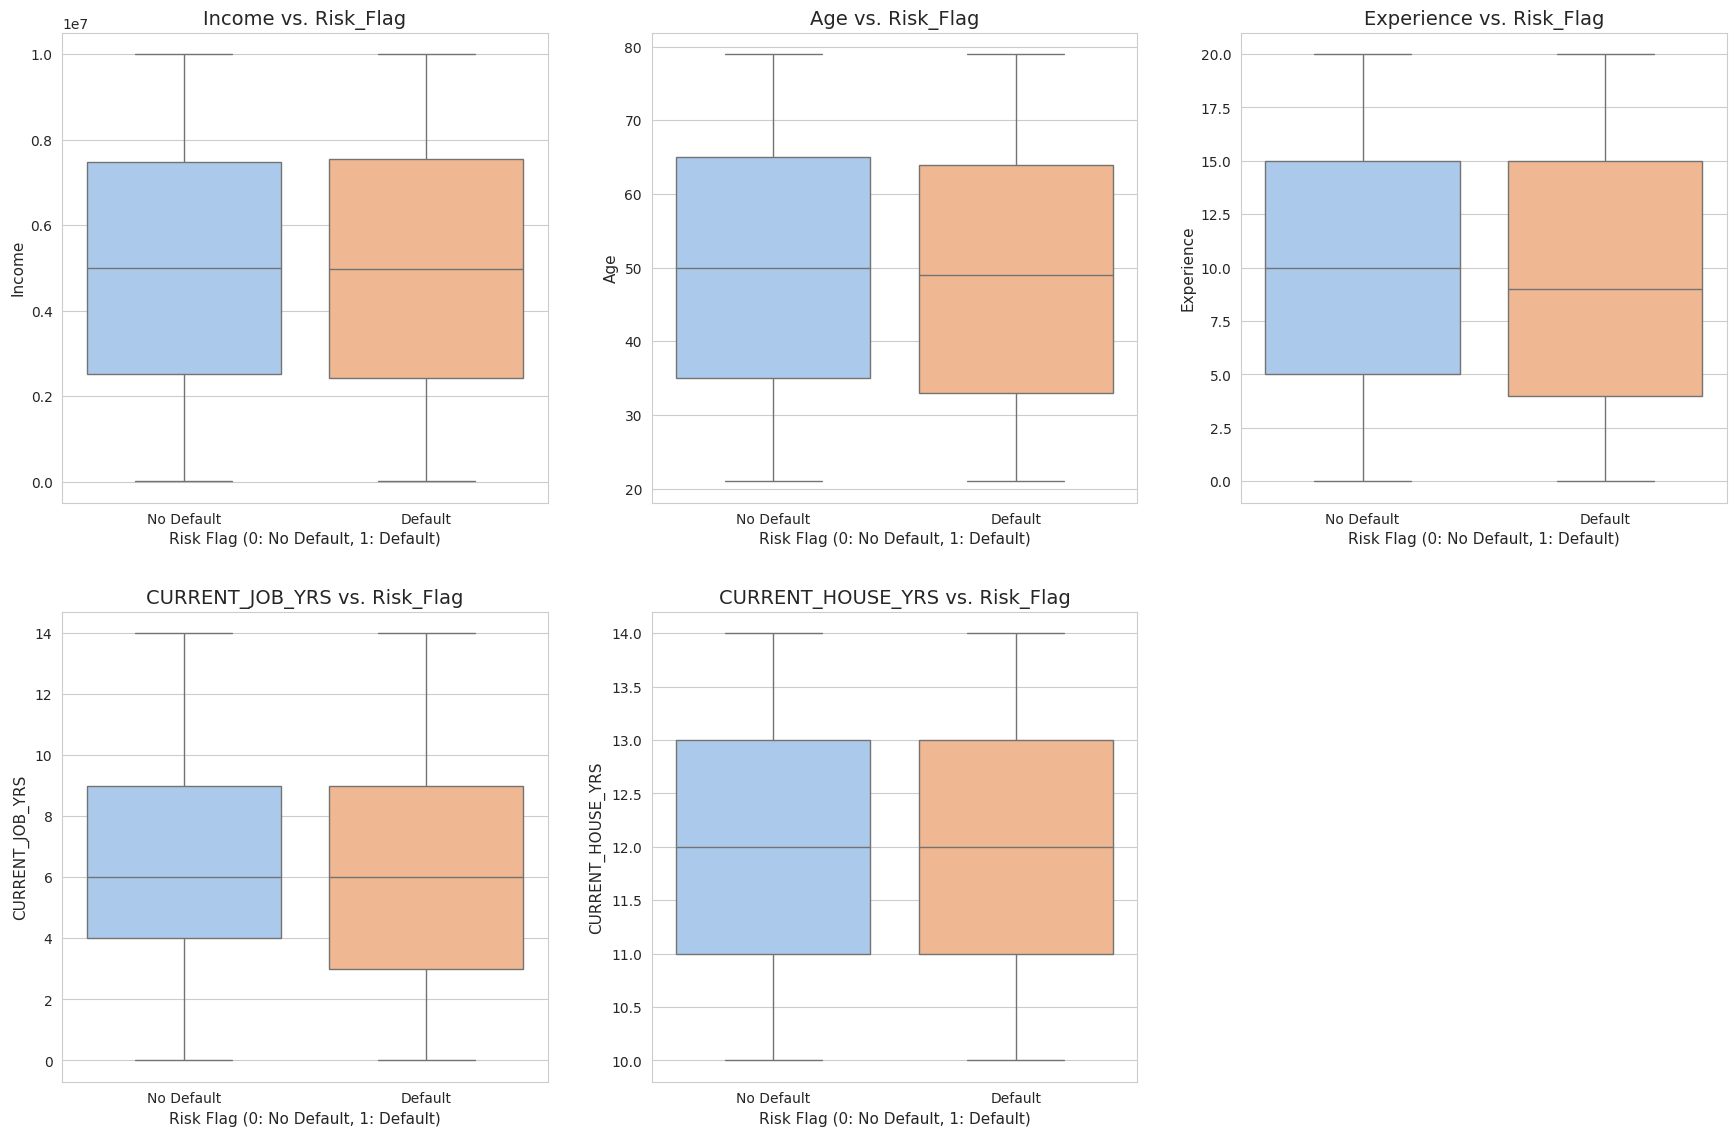


Completed plotting numerical features vs. target variable.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style is set
sns.set_style("whitegrid")

print("\n--- 3.3. Analyzing Numerical Features vs. Risk_Flag (Target Variable) ---")

numerical_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Create subplots for each numerical feature vs. Risk_Flag
plt.figure(figsize=(18, 12)) # Adjusted figure size for better visibility
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    sns.boxplot(x='Risk_Flag', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs. Risk_Flag', fontsize=14)
    plt.xlabel('Risk Flag (0: No Default, 1: Default)', fontsize=11)
    plt.ylabel(col, fontsize=11)
    plt.xticks(ticks=[0, 1], labels=['No Default', 'Default'])
plt.tight_layout(pad=3.0) # Added padding for better layout
plt.show()

print("\nCompleted plotting numerical features vs. target variable.")


 --- 3.4. Analyze Categorical Features Distribution and their relation with Risk_Flag ---


Code:


--- 3.4. Analyzing Categorical Features Distribution and their relation with Risk_Flag ---


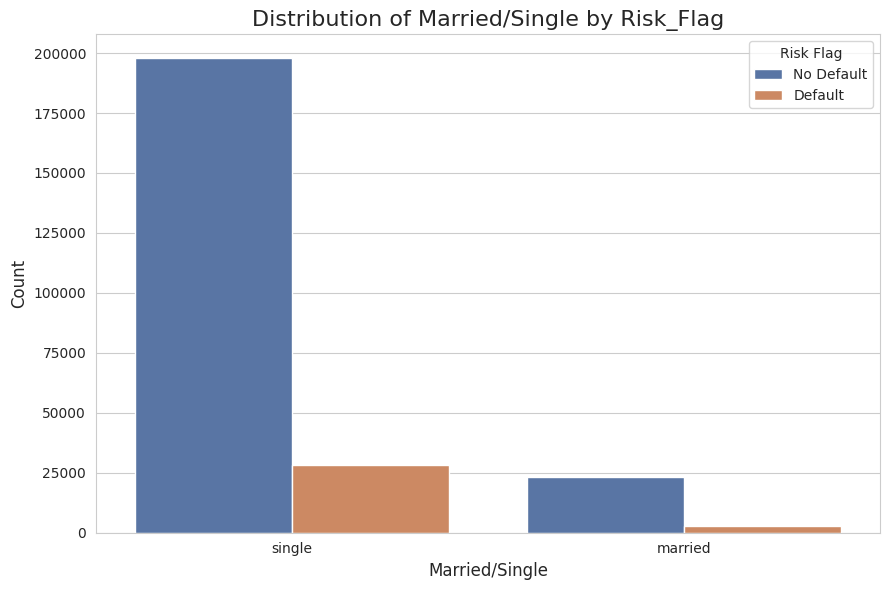

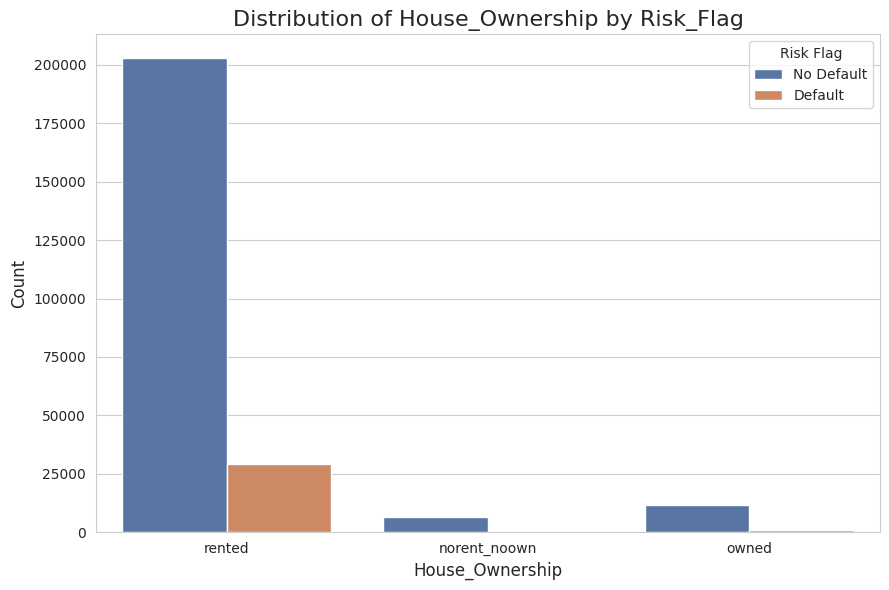

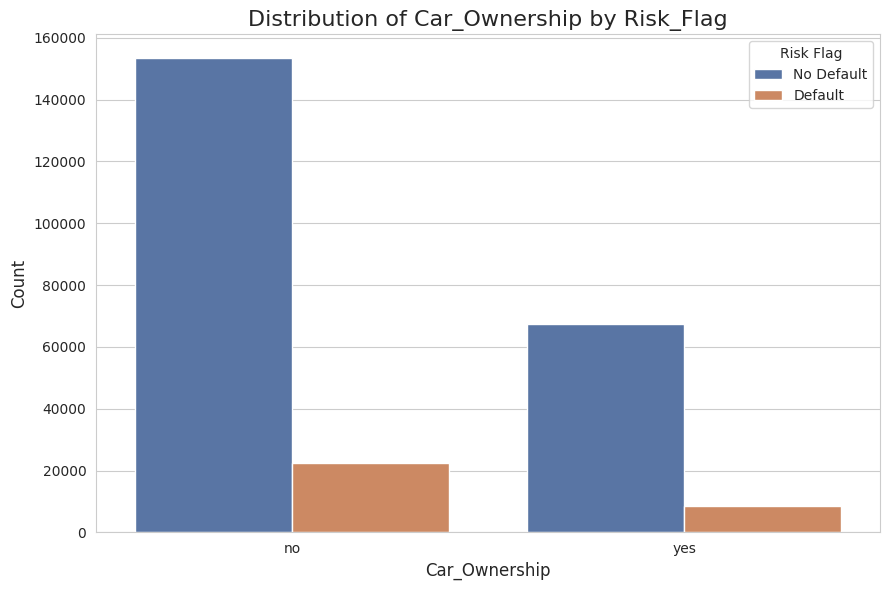


Analyzing 'Profession' for default rates:
Top 10 Profession by Default Rate:
Profession
Police_officer          16.41
Chartered_Accountant    15.36
Army_officer            15.21
Surveyor                15.15
Software_Developer      14.84
Scientist               14.43
Geologist               14.43
Civil_engineer          13.58
Official                13.58
Firefighter             13.58
Name: 1, dtype: float64

Analyzing 'CITY' for default rates:
Top 10 CITY by Default Rate:
CITY
Bhubaneswar    32.62
Gwalior        27.27
Bettiah[33]    26.70
Kochi          25.29
Raiganj        23.96
Purnia[26]     23.89
Barasat        23.87
Sikar          23.85
Buxar[37]      23.15
Satna          22.57
Name: 1, dtype: float64

Analyzing 'STATE' for default rates:
Top 10 STATE by Default Rate:
STATE
Manipur              21.55
Tripura              16.81
Kerala               16.71
Jammu_and_Kashmir    15.90
Madhya_Pradesh       15.44
Odisha               14.26
Rajasthan            14.08
Jharkhand          

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style is set
sns.set_style("whitegrid")

print("\n--- 3.4. Analyzing Categorical Features Distribution and their relation with Risk_Flag ---")

# --- Low Cardinality Categorical Features ---
low_cardinality_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership']

for col in low_cardinality_cols:
    plt.figure(figsize=(9, 6))
    # Use 'hue' to separate by Risk_Flag
    sns.countplot(x=col, hue='Risk_Flag', data=df, palette='deep')
    plt.title(f'Distribution of {col} by Risk_Flag', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0) # Keep labels horizontal if few categories
    plt.legend(title='Risk Flag', labels=['No Default', 'Default'])
    plt.tight_layout()
    plt.show()

# --- High Cardinality Categorical Features: Profession, CITY, STATE ---
# We will look at the default rate for top categories for these.
high_cardinality_cols = ['Profession', 'CITY', 'STATE']

for col in high_cardinality_cols:
    print(f"\nAnalyzing '{col}' for default rates:")
    # Calculate default rates for each category
    default_rates = df.groupby(col)['Risk_Flag'].value_counts(normalize=True).unstack().fillna(0)
    # Filter for the '1' (Default) column
    default_rate_only = default_rates[1].sort_values(ascending=False)

    # Display top 10 categories by default rate
    print(f"Top 10 {col} by Default Rate:")
    print(default_rate_only.head(10).round(4) * 100) # Display as percentage



##🟢 4. Data Cleaning and Preprocessing


This is a critical stage where we transform our raw data into a clean and suitable format for machine learning models. Clean and well-preprocessed data significantly improves model performance and reliability. Based on our comprehensive Exploratory Data Analysis (EDA), we identified several key areas that need attention.

4.1. Handling Missing Values and Dropping 'Id' Column

Code:

In [15]:
import pandas as pd

# Load the dataset again just to ensure we're starting fresh with the original df
# (Assuming you've run the Data Loading step successfully at the very beginning)
# If 'df' is already loaded from previous steps, you can skip this line or ensure it's the original.
try:
    df = pd.read_csv('Loan_Prediction.csv')
    print("Original dataset re-loaded for clean start of preprocessing.")
except FileNotFoundError:
    print("Error: Loan_Prediction.csv not found. Please ensure the file is uploaded to Google Colab.")
    exit()

print("\n--- 4.1.1. Checking for Missing Values ---")
# Display the count of null values for each column
print("Missing values before processing:")
print(df.isnull().sum())

print("\n--- 4.1.2. Dropping 'Id' Column ---")
# Check if 'Id' column exists and drop it
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print("'Id' column dropped successfully.")
else:
    print("'Id' column not found or already dropped.")

print("\nMissing values after dropping 'Id' (if applicable):")
print(df.isnull().sum())
print("\nDataFrame shape after dropping 'Id':", df.shape)

Original dataset re-loaded for clean start of preprocessing.

--- 4.1.1. Checking for Missing Values ---
Missing values before processing:
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

--- 4.1.2. Dropping 'Id' Column ---
'Id' column dropped successfully.

Missing values after dropping 'Id' (if applicable):
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

DataFrame shape after dropping 'Id': (252000, 12)


4.2. Encoding Categorical Features

In [17]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


Code:

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder # Make sure you have this library installed (pip install category_encoders)
from sklearn.model_selection import train_test_split # Needed for proper data splitting

print("\n--- 4.2. Encoding Categorical Features ---")

# Separate features (X) and target (y)
# Ensure df here is the one *after* 'Id' column removal
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

# Split the data into training and testing sets
# This is crucial for correctly applying Target Encoding and evaluating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training (X_train shape: {X_train.shape}) and testing (X_test shape: {X_test.shape}).")
print("Target variable 'y' has been stratified to maintain class balance in train/test sets.")


# Identify column types *from X_train* to ensure consistency
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
# Exclude 'CITY' from standard categorical processing as it needs Target Encoding
categorical_features_onehot = X_train.select_dtypes(include=['object']).columns.drop('CITY', errors='ignore')
city_feature = ['CITY'] if 'CITY' in X_train.columns else []

print(f"\nIdentified Numerical features: {list(numerical_features)}")
print(f"Identified Categorical features for One-Hot Encoding: {list(categorical_features_onehot)}")
print(f"Identified Feature for Target Encoding: {list(city_feature)}")


# Define the preprocessing steps using ColumnTransformer
# 'num': Standardize numerical features
# 'cat_onehot': One-Hot Encode specified categorical features
# 'city_target': Target Encode the 'CITY' feature (fit on X_train, y_train)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features_onehot),
        ('city_target', TargetEncoder(cols=city_feature), city_feature) # TargetEncoder expects 'cols' argument
    ],
    remainder='passthrough' # Keep any other columns not explicitly transformed (shouldn't be any here)
)

print("\nPreprocessing steps for categorical and numerical features defined.")
print("The `preprocessor` (ColumnTransformer) is ready. It includes:")
print("- StandardScaler for numerical features.")
print("- OneHotEncoder for other categorical features.")
print("- TargetEncoder for the 'CITY' feature.")
print("\nThis preprocessor will be integrated into our Machine Learning Pipeline.")


--- 4.2. Encoding Categorical Features ---
Data split into training (X_train shape: (201600, 11)) and testing (X_test shape: (50400, 11)).
Target variable 'y' has been stratified to maintain class balance in train/test sets.

Identified Numerical features: ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
Identified Categorical features for One-Hot Encoding: ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'STATE']
Identified Feature for Target Encoding: ['CITY']

Preprocessing steps for categorical and numerical features defined.
The `preprocessor` (ColumnTransformer) is ready. It includes:
- StandardScaler for numerical features.
- OneHotEncoder for other categorical features.
- TargetEncoder for the 'CITY' feature.

This preprocessor will be integrated into our Machine Learning Pipeline.


##🟢 5. Building a Machine Learning Model


In this crucial phase, we will select, train, and evaluate machine learning classification models to predict loan default. Based on our project plan and EDA insights (especially the class imbalance), we will focus on models suitable for binary classification and evaluate them using appropriate metrics beyond just accuracy.

Code:


--- 5. Building a Machine Learning Model (XGBoost) ---
Data and Preprocessor re-initialized for model building.

--- 5.1. Defining and Training XGBoost Model Pipeline ---
Scale_pos_weight calculated: 7.13
Model Pipeline created. Starting training...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:01:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.

--- 5.2. Making Predictions on Test Data ---

--- 5.3. Evaluating Model Performance ---
Accuracy: 0.7486
Precision: 0.2954
Recall: 0.7535
F1-Score: 0.4244
ROC-AUC Score: 0.8189

Confusion Matrix:
[[33058 11143]
 [ 1528  4671]]


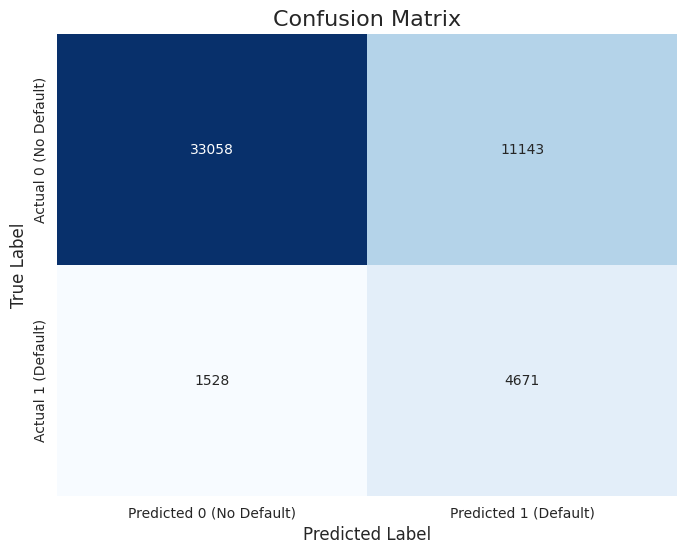


Model building and evaluation complete.
Please share all the printed metrics and the Confusion Matrix plot for analysis.


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from xgboost import XGBClassifier # Make sure to install xgboost if not already: !pip install xgboost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n--- 5. Building a Machine Learning Model (XGBoost) ---")

# Re-define X, y, X_train, X_test, y_train, y_test and preprocessor here
# This ensures continuity if the notebook cells are run independently or out of order.
# In a continuous Colab session, 'df', 'X_train', 'X_test', 'y_train', 'y_test', 'preprocessor'
# should already be in memory from previous steps.

# Re-load df and perform initial drops/splits if this cell is run stand-alone
try:
    df = pd.read_csv('Loan_Prediction.csv')
    if 'Id' in df.columns:
        df = df.drop('Id', axis=1)
    X = df.drop('Risk_Flag', axis=1)
    y = df['Risk_Flag']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features_onehot = X_train.select_dtypes(include=['object']).columns.drop('CITY', errors='ignore')
    city_feature = ['CITY'] if 'CITY' in X_train.columns else []

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features_onehot),
            ('city_target', TargetEncoder(cols=city_feature), city_feature)
        ],
        remainder='passthrough'
    )
    print("Data and Preprocessor re-initialized for model building.")
except Exception as e:
    print(f"Error re-initializing data/preprocessor: {e}. Assuming they are already in memory from previous steps.")


# --- 5.1. Define and Train the XGBoost Model Pipeline ---
print("\n--- 5.1. Defining and Training XGBoost Model Pipeline ---")

# Define the XGBoost Classifier
# We'll use scale_pos_weight to help with class imbalance.
# It's (count_negative_class / count_positive_class)
scale_pos_weight_value = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale_pos_weight calculated: {scale_pos_weight_value:.2f}")

xgb_model = XGBClassifier(
    objective='binary:logistic', # For binary classification
    eval_metric='logloss',       # Evaluation metric during training
    use_label_encoder=False,     # Suppress warning for future version of sklearn
    n_estimators=100,            # Number of boosting rounds
    learning_rate=0.1,           # Step size shrinkage to prevent overfitting
    random_state=42,
    scale_pos_weight=scale_pos_weight_value # To handle class imbalance
)

# Create the full pipeline: Preprocessing -> XGBoost Model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

print("Model Pipeline created. Starting training...")
# Train the model
model_pipeline.fit(X_train, y_train)
print("Model training complete.")


# --- 5.2. Make Predictions ---
print("\n--- 5.2. Making Predictions on Test Data ---")
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilities for the positive class (1)


# --- 5.3. Evaluate the Model ---
print("\n--- 5.3. Evaluating Model Performance ---")

# Calculate common classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (No Default)', 'Predicted 1 (Default)'],
            yticklabels=['Actual 0 (No Default)', 'Actual 1 (Default)'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

print("\nModel building and evaluation complete.")

##🟢 6. Smart Recommendations (Recovery Actions)


This is where the predictive power of our ML model translates into practical business value. Instead of just predicting Default or No Default, we want to suggest specific, smart recovery actions based on the predicted risk level.

Code:

In [20]:
import pandas as pd
import numpy as np
# Assuming X_test, y_test, model_pipeline, y_pred_proba are available from previous steps

print("\n--- 6. Smart Recommendations (Recovery Actions) ---")

# Ensure X_test has original column names if needed for display later
# (model_pipeline's preprocessor outputs numpy array, so we need to map back for readability)
# For simplicity, we'll just add the predictions to the original X_test structure (before any one-hot encoding for display)
# Create a DataFrame for test results including actuals, predictions, and probabilities
results_df = X_test.copy()
results_df['Actual_Risk_Flag'] = y_test
results_df['Predicted_Risk_Flag'] = y_pred # Binary prediction (0 or 1)
results_df['Predicted_Default_Probability'] = y_pred_proba # Probability of default

print("Sample of predictions and probabilities on test set:")
print(results_df[['Actual_Risk_Flag', 'Predicted_Risk_Flag', 'Predicted_Default_Probability']].head())

# Define a function to suggest recovery actions based on probability
def suggest_recovery_action(probability):
    if probability >= 0.7:
        return 'High Risk: Immediate Contact & Review'
    elif probability >= 0.4:
        return 'Medium Risk: Proactive Reminders & Rescheduling Offer'
    else:
        return 'Low Risk: Standard Monitoring'

# Apply the function to create the 'Suggested_Action' column
results_df['Suggested_Action'] = results_df['Predicted_Default_Probability'].apply(suggest_recovery_action)

print("\nSample of test set with Suggested Recovery Actions:")
# Display a sample of high-risk predictions
print(results_df[results_df['Suggested_Action'] == 'High Risk: Immediate Contact & Review'].head())

print("\nDistribution of Suggested Actions:")
print(results_df['Suggested_Action'].value_counts())

# Optional: Analyze default rates per suggested action to validate logic
print("\nActual Default Rate per Suggested Action Category:")
action_default_rate = results_df.groupby('Suggested_Action')['Actual_Risk_Flag'].mean() * 100
print(action_default_rate.sort_values(ascending=False))

print("\nSmart Recommendations generation complete.")
print("Next, we will proceed to 7. Professional Dashboard (Power BI or Tableau).")


--- 6. Smart Recommendations (Recovery Actions) ---
Sample of predictions and probabilities on test set:
        Actual_Risk_Flag  Predicted_Risk_Flag  Predicted_Default_Probability
73540                  0                    0                       0.278228
106484                 0                    0                       0.208621
164137                 0                    0                       0.218220
36524                  0                    0                       0.285214
233388                 1                    0                       0.329764

Sample of test set with Suggested Recovery Actions:
         Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
13939   9241052   69           2         single          rented           yes   
39895   9290267   54           4         single          rented           yes   
222008  6633105   69           0         single          rented            no   
211371  8419826   31           0         single        

## Save And Download

In [21]:
import pandas as pd

# Assuming 'results_df' is available from the previous step (6. Smart Recommendations)
# If running this cell independently, ensure 'results_df' is created first.

print("\n--- 8.1. Exporting Results to CSV ---")

# Define the filename for your exported CSV
output_csv_filename = 'loan_recovery_predictions.csv'

# Export the results_df to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
results_df.to_csv(output_csv_filename, index=False)

print(f"Results successfully exported to '{output_csv_filename}'")
print(f"You can find this file in your Google Colab files directory (left sidebar, folder icon).")
print(f"From there, you can download it to your local machine.")


--- 8.1. Exporting Results to CSV ---
Results successfully exported to 'loan_recovery_predictions.csv'
You can find this file in your Google Colab files directory (left sidebar, folder icon).
From there, you can download it to your local machine.
